In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Download latest version
path = kagglehub.dataset_download("nikhileswarkomati/suicide-watch")

print("Path to dataset files:", path)

# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print(df.head())

print(df.info())
print(df.describe())
print(df.shape)
print(df.columns)
df.dtypes

# Convert 'class' column to numerical representation (0 or 1)
df['class'] = df['class'].map({'suicide': 1, 'non-suicide': 0})

# Display the updated DataFrame to verify the changes
print(df.head())

100%|██████████| 60.6M/60.6M [00:00<00:00, 64.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nikhileswarkomati/suicide-watch/versions/14
                                                text        class
0  Ex Wife Threatening SuicideRecently I left my ...      suicide
1  Am I weird I don't get affected by compliments...  non-suicide
2  Finally 2020 is almost over... So I can never ...  non-suicide
3          i need helpjust help me im crying so hard      suicide
4  I’m so lostHello, my name is Adam (16) and I’v...      suicide
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB
None
                                                     text    class
count                                              232074   232074
unique                                             232074        2
t

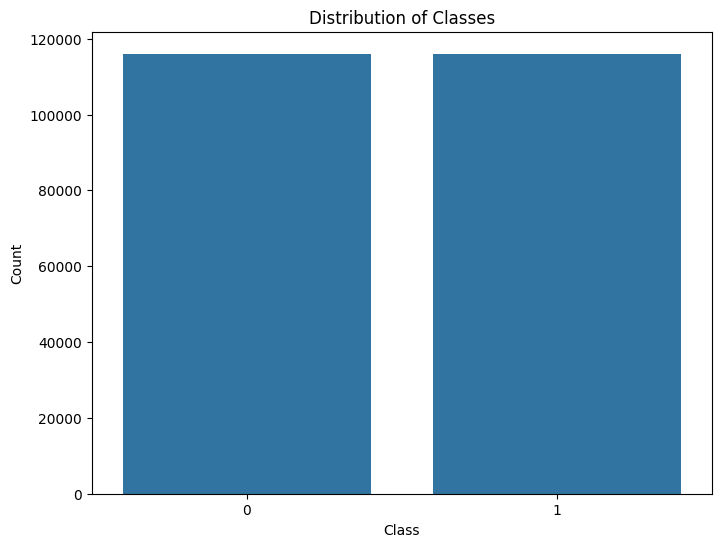

In [ ]:
# Make a graph showing the class distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Make a box plot showing the distribution of text length

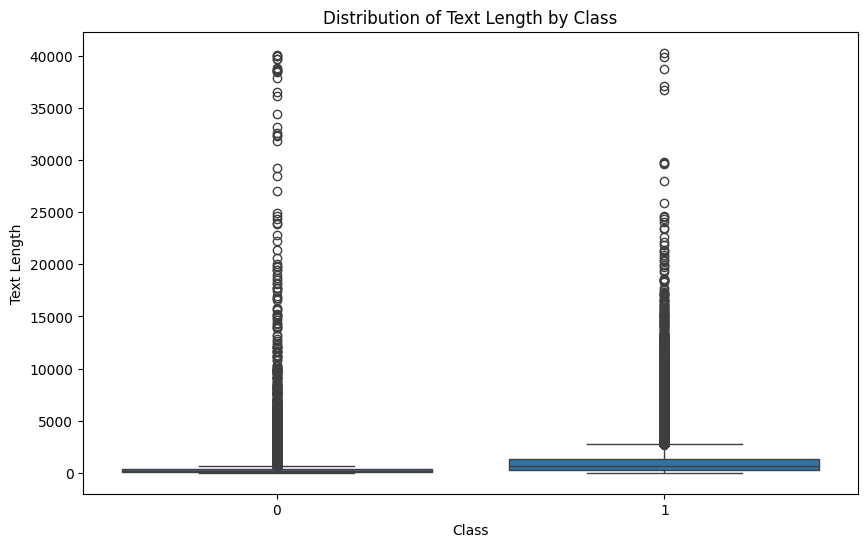

In [ ]:
# Calculate the length of each text in the 'text' column
df['text_length'] = df['text'].apply(len)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='text_length', data=df)
plt.title('Distribution of Text Length by Class')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.show()

# Make a box plot showing the distribution of text length but remove outlies above 5000

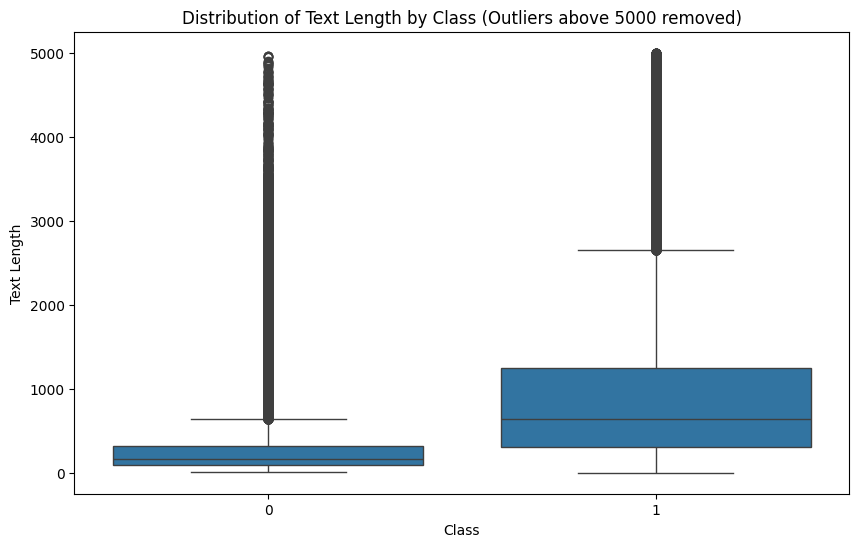

In [ ]:
# Filter out outliers above 5000
df_filtered = df[df['text_length'] <= 5000]

# Create the box plot with filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='text_length', data=df_filtered)
plt.title('Distribution of Text Length by Class (Outliers above 5000 removed)')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.show()

# Make a histogram showing text length distribution but remove the longest 5% of texts

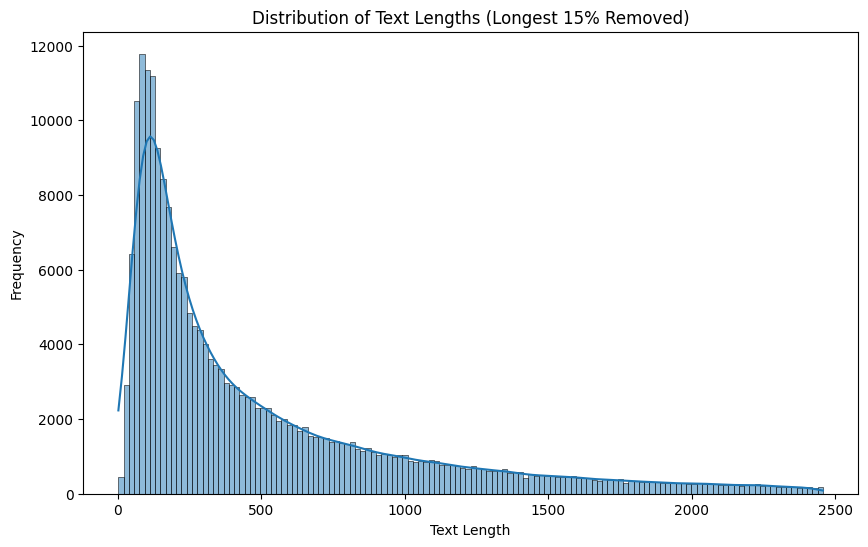

In [ ]:
# Calculate the 95th percentile of text lengths
percentile_95 = df['text_length'].quantile(0.95)

# Filter out the longest 15% of texts
df_filtered = df[df['text_length'] <= percentile_95]

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['text_length'], kde=True)
plt.title('Distribution of Text Lengths (Longest 15% Removed)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Make separate histograms for each class only using the shortest 95% or texts

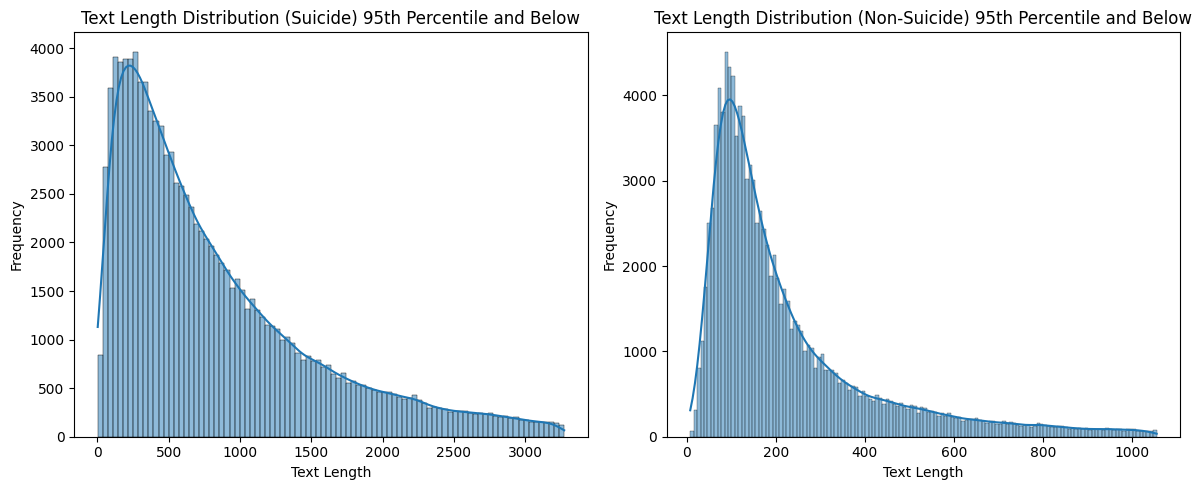

In [ ]:
# Calculate the 95th percentile of text lengths for each class
percentile_95_suicide = df[df['class'] == 1]['text_length'].quantile(0.95)
percentile_95_non_suicide = df[df['class'] == 0]['text_length'].quantile(0.95)

# Filter out the longest 5% of texts for each class
df_filtered_suicide = df[(df['class'] == 1) & (df['text_length'] <= percentile_95_suicide)]
df_filtered_non_suicide = df[(df['class'] == 0) & (df['text_length'] <= percentile_95_non_suicide)]

# Create separate histograms for each class
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_filtered_suicide['text_length'], kde=True)
plt.title('Text Length Distribution (Suicide) 95th Percentile and Below')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_filtered_non_suicide['text_length'], kde=True)
plt.title('Text Length Distribution (Non-Suicide) 95th Percentile and Below')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()